In [1]:
# 이미지 넣기 
from IPython.display import Image

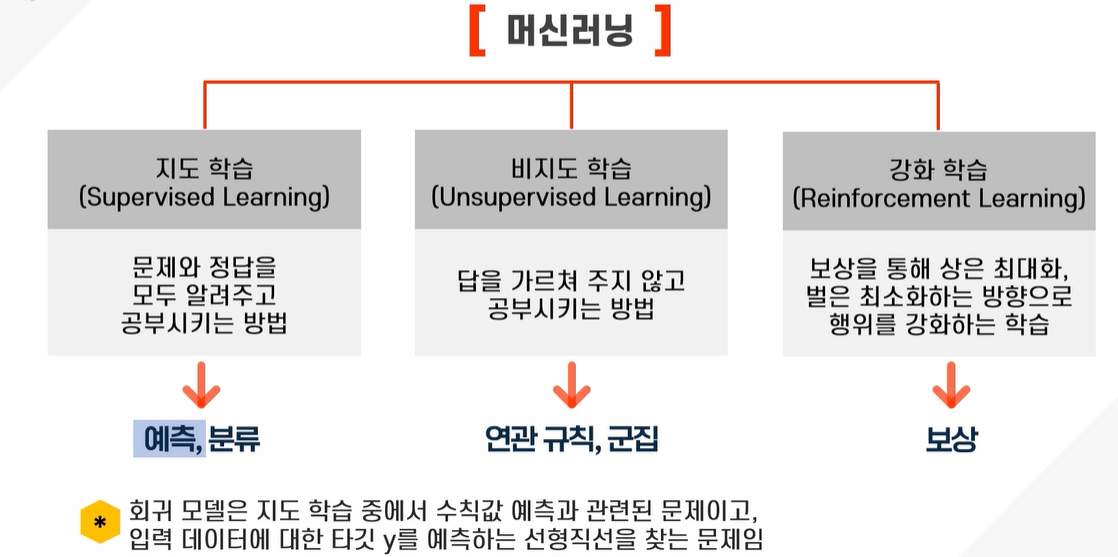

In [2]:
Image("img/img02_01.png")

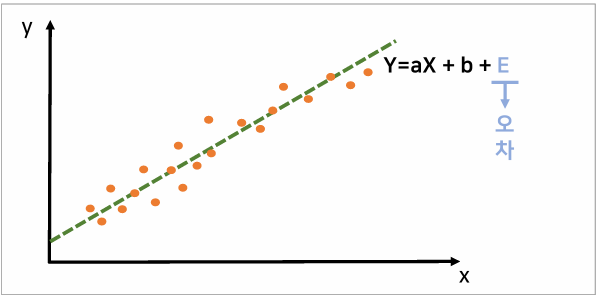

In [3]:
Image("img/img02_02.png")

# 직선형식의 모델이 나온다.
# 그리고 회귀 모델은 쿼리티를 예측하는 문제에 해당함

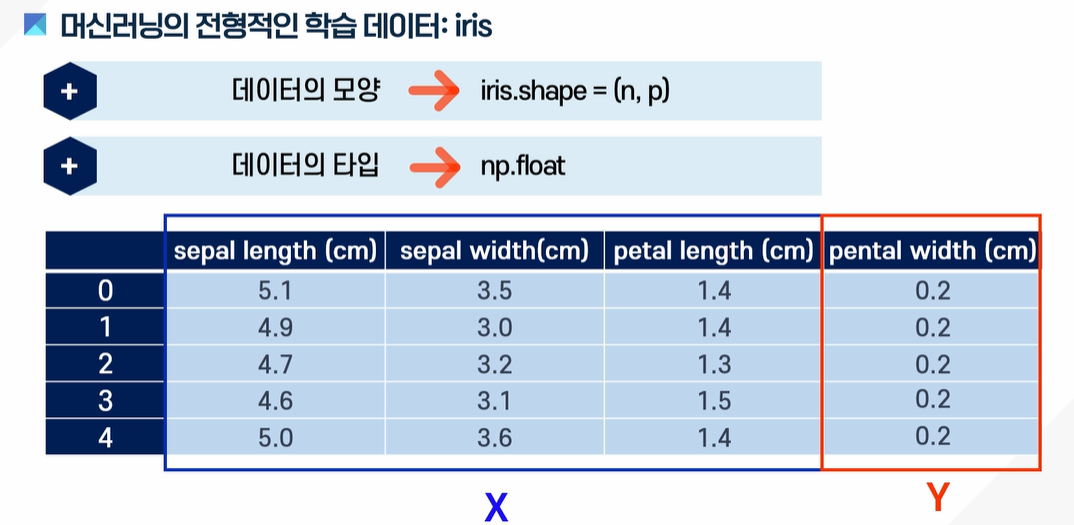

In [4]:
Image("img/img02_03.png")

## 선형 회귀의 주요 가정
- 각 변수는서로독립이며, 타깃변수와선형상관관계를가짐
- 에러e는 서로독립이며, 정규분포의특성을가짐

### 선형 회귀 모델을 사용하여 캘리포니아 주택 데이터에 대해 학습하고, 테스트 세트에서 모델의 성능을 평가하는 과정
> 선형 회귀 모델을 사용하여 주어진 데이터를 학습시키고, 테스트 데이터에 대한 모델의 성능을 결정계수(R^2)로 평가하여 출력합니다. 결정계수는 모델의 예측 정확도를 나타내는 지표

In [5]:
!pip install scikit-learn

In [6]:
# load_boston 함수는 더 이상 사용되지 않으므로, 대신 fetch_california_housing 데이터를 사용할 수 있습니다.
# 다음은 캘리포니아 주택 데이터를 사용하는 코드입니다:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 캘리포니아 주택 데이터셋 로드
# data.data: 
# 1. 입력 변수(특징)들의 전체 데이터셋
#    캘리포니아 주택 데이터셋의 경우 각 집에 대한 다양한 특징(예: 인구, 평균 소득 등)이 포함되어 있습니다.)
# 2. data.target: 타겟 값(레이블)들의 전체 데이터셋입니다. 
#    캘리포니아 주택 데이터셋의 경우 각 집의 주택 가격이 타겟 값으로 사용됩니다.
# 3. train_test_split 함수 : sklearn.model_selection 모듈에 포함된 함수로, 데이터를 훈련 세트와 테스트 세트로 나누는 역할을 합니다.
# 4. X_train: 훈련 세트의 입력 변수(특징)들입니다. 전체 데이터셋의 일부로, 모델을 학습시키는 데 사용됩니다.
# 5. X_test: 테스트 세트의 입력 변수(특징)들입니다. 전체 데이터셋의 일부로, 모델의 성능을 평가하는 데 사용됩니다.
# 6. y_train: 훈련 세트의 타겟 값(레이블)들입니다. 모델 학습 시 입력 변수와 함께 사용됩니다.
# 7. y_test: 테스트 세트의 타겟 값(레이블)들입니다. 모델 성능 평가 시 입력 변수와 함께 사용됩니다.
# ** 전체 데이터셋을 훈련 세트와 테스트 세트로 나누어 모델을 학습시키고 평가하는 데 사용합니다. 
#    X_train과 y_train은 모델 학습에 사용되고, X_test와 y_test는 모델 평가에 사용됩니다
data = fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(data.data.shape, data.target.shape) 

(20640, 8) (20640,)


In [8]:

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# 결과 분할 확인을 위한 모양 출력
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 결과의 뜻
# X_train shape: (15480, 8)은 훈련 세트에 15,480개의 샘플이 있으며, 각 샘플에는 8개의 특징이 있음을 의미
# X_test shape: (5160, 8)은 테스트 세트에 5,160개의 샘플이 있으며, 각 샘플에는 8개의 특징이 있음을 의미
# y_train shape: (15480,)은 훈련 세트의 타겟 값이 15,480개 있음을 의미(8개중에 하나에 속한다.)
# y_test shape: (5160,)은 테스트 세트의 타겟 값이 5,160개 있음을 의미(8개중에 하나에 속한다.)

X_train shape: (15480, 8)
X_test shape: (5160, 8)
y_train shape: (15480,)
y_test shape: (5160,)


In [9]:
# 선형 회귀 모델을 구현
from sklearn.linear_model import LinearRegression
# 선형 회귀 모델 객체 생성
model = LinearRegression()
# 훈련 데이터를 사용하여 선형 회귀 모델을 학습 시킨다.
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# 테스트 데이터를 사용하여 모델의 성능을 평가
# model.score 메서드는 결정계수(R^2)를 계산하여 반환
# R^2 값은 모델의 예측이 실제 값에 얼마나 잘 맞는지를 나타내는 지표(1에 가까울수록 좋은 성능)
score = model.score(X_test, y_test)
print(f"결정계수 : {score}")

결정계수 : 0.5910509795491352


## 1.2 회귀 모델의 평가
### 1) 결정계수 
###   결정계수 R2 는 회귀 분석의 결과를 평가하는 데 사용되는 통계적 지표
- 독립 변수들이 종속 변수의 변동 얼마나 설명하는지를 나타냅니다.  
- 값은 0과 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터에 잘 맞는다는 것을 의미합니다.

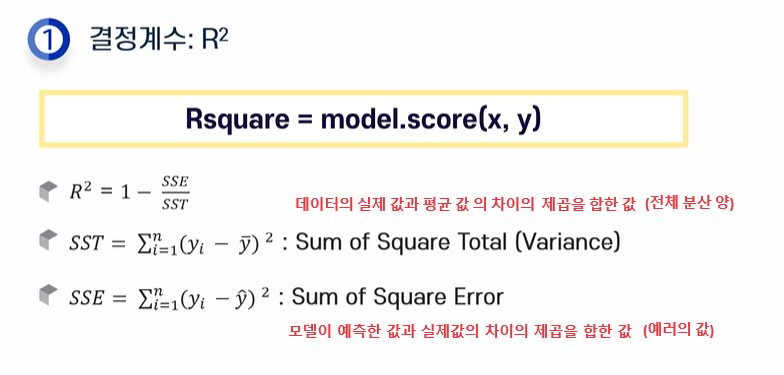

In [11]:
Image("img/img02_04.png")

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
X, y = california.data, california.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결정계수 (R^2) 계산
r2 = r2_score(y_test, y_pred)
print("결정계수 (R^2):", r2)

결정계수 (R^2): 0.575787706032451


### 2) 평균 절대 오차(MAE, Mean Absolute Error)는 회귀 모델의 예측 성능을 평가하기 위한 지표
- 예측값과 실제값 사이의 절대 오차들의 평균
- 예측값이 실제값에서 얼마나 떨어져 있는지를 직관적으로 이해할 수 있게 해줍니다
- MAE 값이 작을수록 모델의 예측이 실제값에 가깝다는 것을 의미합니다. 
- 예측값이 실제값보다 크게 벗어나는 경우에 민감하게 반응합니다.

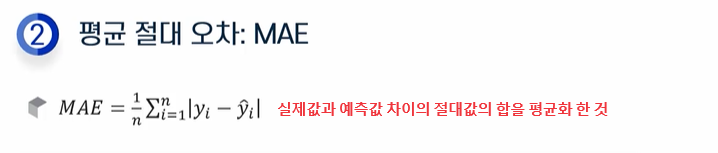

In [15]:
Image("img/img02_05.png")

In [25]:
# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("평균 절대 오차 (MAE):", mae)

평균 절대 오차 (MAE): 0.5332001304956565


### 3)  결정계수 R2 와  평균 절대 오차(MAE) 둘 다 구하기

In [22]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 캘리포니아 주택가격 데이터셋 로드
california = fetch_california_housing()

# 특성과 타깃 변수를 분리
X, y = california.data, california.target

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결정계수 (R^2) 계산
r2 = r2_score(y_test, y_pred)
print("결정계수 (R^2):", r2)

# 평균 절대 오차 (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("평균 절대 오차 (MAE):", mae)

결정계수 (R^2): 0.575787706032451
평균 절대 오차 (MAE): 0.5332001304956565


평균 절대 오차 (MAE): 0.5332001304956565


### 3) 시각적인 평가 (산점도)
> 회귀 분석의 시각화 방법 중 하나는 실제값과 예측값을 비교하는 산점도를 그리는 것입니다.<br>
이를 통해 모델이 얼마나 정확하게 예측하는지 시각적으로 평가할 수 있습니다.

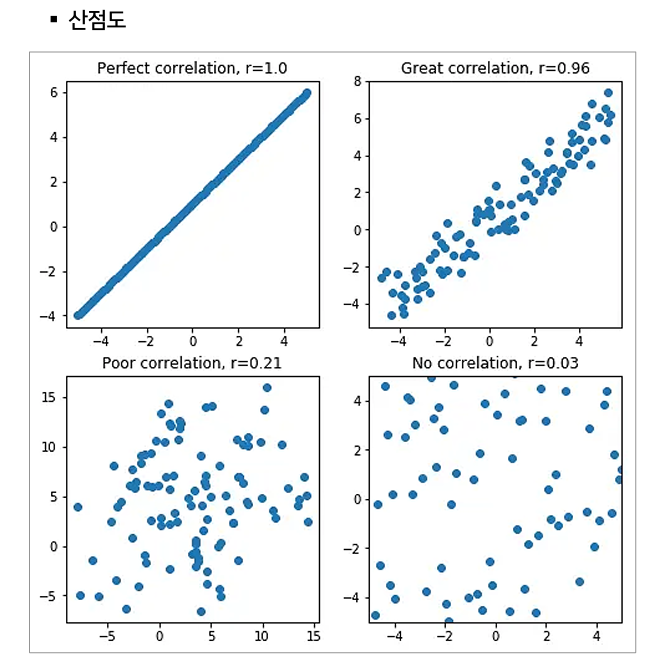

In [27]:
Image("img/img02_06.png")

# 실제 값과 예측 값이 완전히 일치하면 r=1.0 으로 직선이된다. 0에 가까울 수록 퍼져있음

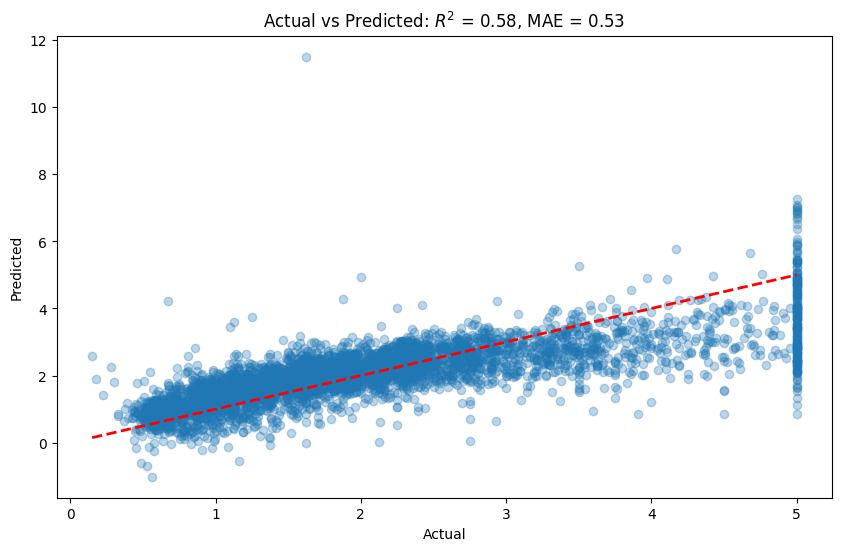

In [24]:
import matplotlib.pyplot as plt
# 실제값과 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: $R^2$ = {:.2f}, MAE = {:.2f}'.format(r2, mae))
plt.show()

### 문제점

#### 1. 임의의 noise가 추가 되는 경우 이를 신호로 해석하며, 이로 인해 학습 결정계수는 증가하지만, 테스트 결정계수는 오히려 감소

#### 전제 조건이 각 변수는서로독립이며, 타깃변수와 선형상관관계를 가짐
#### 2. 입력변수간 상관성이 높은 경우(다중공선성문제)
- 학습량이 증가 할 경우 신호간의 미세한 차이를 해석하기위해 회귀계수가 커지는 경향이 있음
- 신호간의 미세한 차이는 노이즈일 가능성이큼
- 이로 인해 역시 테스트 성능이 점점 나빠짐
#### 3. 타깃과 입력변수간의 선형관계가 아닌 경우
- 선형관계로 근사할 수 있는 모델을 생성함
- 그러나 선형관계 근사가 불가능한 영역밖에서(외삽) 예측하면 **에러가 매우커짐**

[Quiz] 임의의 noise 데이터를 추가할 때, 학습 데이터에서의 $R^2$은 어떻게 될까?

In [33]:
noise = np.random.randint(5, 30, (data.data.shape[0], 100))
newX = np.hstack([noise, data.data])

X_train, X_test, y_train, y_test = train_test_split(newX, data.target, random_state=42)
m = LinearRegression()
m.fit(X_train, y_train)

R2newTr = m.score(X_train, y_train)
R2newTe = m.score(X_test, y_test)
print("기본 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2train, score))
print("노이즈 데이터에서 학습 결정계수: %.3f, 테스트 결정계수: %.3f" %(R2newTr, R2newTe))

기본 데이터에서 학습 결정계수: 0.610, 테스트 결정계수: 0.591
노이즈 데이터에서 학습 결정계수: 0.613, 테스트 결정계수: 0.587


####  임의의 noise가 추가 되는 경우 이를 신호로 해석하며, 이로 인해 학습 결정계수는 증가하지만, 테스트 결정계수는 오히려 감소